# TA-Lib Technical Analysis Library

In [1]:
import numpy as np
import talib
import matplotlib.pyplot as plt
import mplfinance as mpf
from dataset import kline_data
from dateutil import parser

In [2]:
btc_1d = kline_data(interval='1d')
btc_1d = btc_1d.set_index(btc_1d['open_time'].map(parser.parse))

Last saved data candle close time: 2021-08-09 00:00:00


In [3]:
btc_4h = kline_data(interval='4h')
btc_4h = btc_4h.set_index(btc_4h['open_time'].map(parser.parse))

Last saved data candle close time: 2021-08-11 12:00:00


In [68]:
open_ = np.array(btc_1d['open'])
close = np.array(btc_1d['close'])
high = np.array(btc_1d['high'])
low = np.array(btc_1d['low'])
volume = np.array(btc_1d['volume'])

## Overlap Studies Functions

In [5]:
dema_fast = talib.DEMA(close, timeperiod=21)
dema_slow = talib.DEMA(close, timeperiod=100)
ema_fast = talib.EMA(close, timeperiod=21)
ema_slow = talib.EMA(close, timeperiod=100)
sma_fast = talib.SMA(close, timeperiod=21)
sma_slow = talib.SMA(close, timeperiod=100)
t3_fast = talib.T3(close, timeperiod=21, vfactor=0)  # Suspicious
t3_slow = talib.T3(close, timeperiod=100, vfactor=0)  # Suspicious
tema_fast = talib.TEMA(close, timeperiod=21)
tema_slow = talib.TEMA(close, timeperiod=100)
trima_fast = talib.TRIMA(close, timeperiod=21)
trima_slow = talib.TRIMA(close, timeperiod=100)
wma_fast = talib.WMA(close, timeperiod=21)
wma_slow = talib.WMA(close, timeperiod=100)
kama = talib.KAMA(close, timeperiod=21)
mama, fama = talib.MAMA(close, fastlimit=0.5, slowlimit=0.05)
mavp = talib.MAVP(close, periods=np.array(btc_1d.index).astype('double'), minperiod=2, maxperiod=30, matype=0)

bb_u, bb_m, bb_l = talib.BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
ht = talib.HT_TRENDLINE(close)
midpoint = talib.MIDPOINT(close, timeperiod=21)
midprice = talib.MIDPRICE(high, low, timeperiod=21)
sar = talib.SAR(high, low, acceleration=0.02, maximum=0.2)

## Momentum Indicators

In [124]:
adx = talib.ADX(high, low, close, timeperiod=14)
adxr = talib.ADXR(high, low, close, timeperiod=14)
apo = talib.APO(close, fastperiod=21, slowperiod=100, matype=0)
aroondown, aroonup = talib.AROON(high, low, timeperiod=14)
aroonosc = talib.AROONOSC(high, low, timeperiod=14)
bop = talib.BOP(open_, high, low, close)
cci = talib.CCI(high, low, close, timeperiod=14)
cmo = talib.CMO(close, timeperiod=14)
dx = talib.DX(high, low, close, timeperiod=14)
macd, macdsignal, macdhist = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
macd, macdsignal, macdhist = talib.MACDEXT(close, fastperiod=12, fastmatype=0, slowperiod=26, slowmatype=0,
                                           signalperiod=9, signalmatype=0)  # MACD with controllable MA type
mfi = talib.MFI(high, low, close, volume, timeperiod=14)
minus_di = talib.MINUS_DI(high, low, close, timeperiod=14)
minus_dm = talib.MINUS_DM(high, low, timeperiod=14)
plus_di = talib.PLUS_DI(high, low, close, timeperiod=14)
plus_dm = talib.PLUS_DM(high, low, timeperiod=14)
mom = talib.MOM(close, timeperiod=10)
ppo = talib.PPO(close, fastperiod=21, slowperiod=100, matype=0)
roc = talib.ROC(close, timeperiod=10)
rocp = talib.ROCP(close, timeperiod=10)
rocr = talib.ROCR(close, timeperiod=10)
rocr100 = talib.ROCR100(close, timeperiod=10)
rsi = talib.RSI(close, timeperiod=14)
slowk, slowd = talib.STOCH(high, low, close, fastk_period=5, slowk_period=3,
                           slowk_matype=0, slowd_period=3, slowd_matype=0)  # Stochastic
fastk, fastd = talib.STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)  # Stochastic Fast
rsi_k, rsi_d = talib.STOCHRSI(close, timeperiod=14, fastk_period=5,
                                      fastd_period=3, fastd_matype=0)  # Stochastic RSI
trix = talib.TRIX(close, timeperiod=30)  # 1-day Rate-Of-Change (ROC) of a Triple Smooth EMA
ultosc = talib.ULTOSC(high, low, close, timeperiod1=7, timeperiod2=14, timeperiod3=28)
willr = talib.WILLR(high, low, close, timeperiod=14)

## Volume Indicator Functions

In [130]:
ad = talib.AD(high, low, close, volume)
adosc = talib.ADOSC(high, low, close, volume, fastperiod=3, slowperiod=10)
obv = talib.OBV(close, volume)

## Volatility Indicator Functions

In [138]:
trange = talib.TRANGE(high, low, close)
atr = talib.ATR(high, low, close, timeperiod=14)
natr = talib.NATR(high, low, close, timeperiod=14)

## Price Transform Functions

In [147]:
avgprice = talib.AVGPRICE(open_, high, low, close)
medprice = talib.MEDPRICE(high, low)
typprice = talib.TYPPRICE(high, low, close)
wclprice = talib.WCLPRICE(high, low, close)

## Cycle Indicator Functions

In [158]:
ht_dcperiod = talib.HT_DCPERIOD(close)
ht_dcphase = talib.HT_DCPHASE(close)
inphase, quadrature = talib.HT_PHASOR(close)
sine, leadsine = talib.HT_SINE(close)
trendmode = talib.HT_TRENDMODE(close)

## Pattern Recognition Functions

## Statistic Functions

In [177]:
beta = talib.BETA(high, low, timeperiod=5)
correl = talib.CORREL(high, low, timeperiod=30)
linearreg = talib.LINEARREG(close, timeperiod=14)
linearreg_angle = talib.LINEARREG_ANGLE(close, timeperiod=14)
linearreg_intercept = talib.LINEARREG_INTERCEPT(close, timeperiod=14)
linearreg_slope = talib.LINEARREG_SLOPE(close, timeperiod=14)
stddev = talib.STDDEV(close, timeperiod=5, nbdev=1)
tsf = talib.TSF(close, timeperiod=14)
var = talib.VAR(close, timeperiod=5, nbdev=1)

## Math Transform Functions

## Math Operator Functions

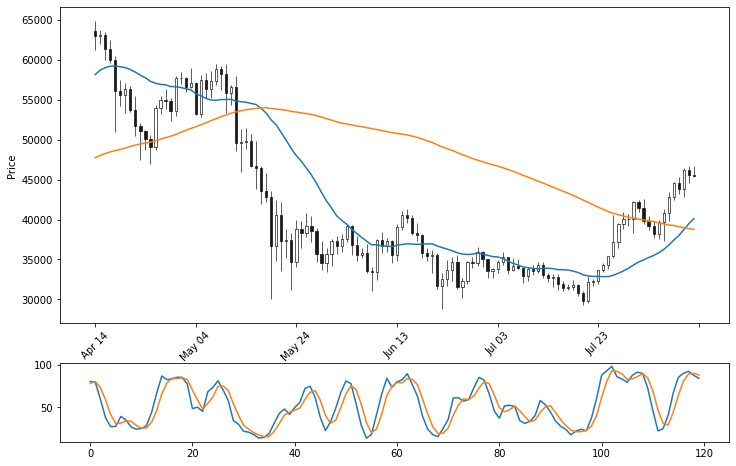

In [179]:
n_days = 120
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(12,8))
mpf.plot(btc_1d[-n_days:], type='candle', volume=False, ax=ax[0])
ax[0].plot(sma_fast[-n_days:])
ax[0].plot(sma_slow[-n_days:])
# ax[1].plot(macd[-n_days:])
# ax[1].plot(macdsignal[-n_days:])
# ax[1].bar(np.arange(n_days), macdhist[-n_days:])
ax[1].plot(slowk[-n_days:])
ax[1].plot(slowd[-n_days:])
# ax[1].plot(np.zeros(n_days), '--', color='k')
# ax[1].plot(np.ones(n_days) * 50, '--', color='k')